## Import dataset

In [1]:
import pandas as pd
from copy import deepcopy

df=pd.read_csv('./dataset/USArrests.csv')
df_x=deepcopy(df.drop(columns=['Unnamed: 0']))
df_x.head() 

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


## Normalize the data

In [2]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler() 

# fitting 
scalar.fit(df_x) 
scaled_data = scalar.transform(df_x)

# np.array to dataframe
df_x=pd.DataFrame(scaled_data, columns=df_x.columns)

## Run KMeans algo for various number of centroids

In [3]:
from sklearn.cluster import KMeans

models=list()

# dummy model with 0 no. of clusters for simplification in computation
modeli=KMeans().fit(df_x)
models.append(modeli)

# clustering algorithm for range 1:10 no of clusters
for i in range(1,11):
    models.append(KMeans(n_clusters=i, init='random',
n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
).fit(df_x))

## Elbow Method analysis to select the best no. of centroids

In [4]:
import matplotlib.pyplot as plt

plt.title("Elbow method analysis")
plt.rcParams['figure.figsize'] = [10, 5]
plt.style.use('dark_background')
plt.plot([model.inertia_ for model in models])
plt.xlabel('no_of_centroids')
plt.xlim(1, 10)
plt.ylabel('inertia')
plt.show()

<Figure size 640x480 with 1 Axes>

## Model selection from elbow method

In [9]:
# Best model selection based on sharp turn in the graph
df['Cluster_index']=models[4].predict(df_x)
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster_index
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


## Data Visualization

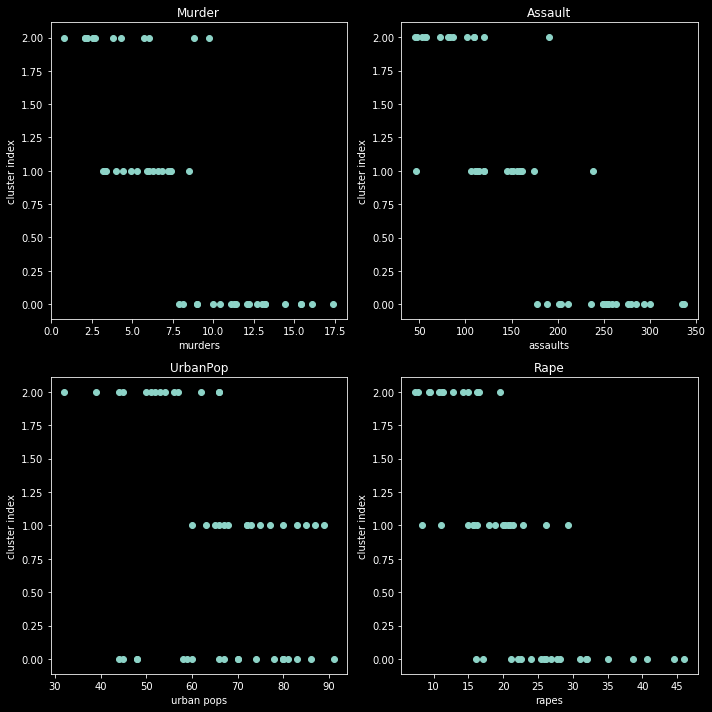

In [8]:
import matplotlib
plt.rcParams['figure.figsize'] = [10, 10]
plt.style.use('dark_background')
matplotlib.rcParams.update({'font.size': 10})

plt.subplot(2,2,1)
plt.title('Murder')
plt.scatter(df['Murder'], df['Cluster_index'])
plt.xlabel('murders')
plt.ylabel('cluster index')
plt.tight_layout()

plt.subplot(2,2,2)
plt.title('Assault')
plt.scatter(df['Assault'], df['Cluster_index'])
plt.xlabel('assaults')
plt.ylabel('cluster index')
plt.tight_layout()

plt.subplot(2,2,3)
plt.title('UrbanPop')
plt.scatter(df['UrbanPop'], df['Cluster_index'])
plt.xlabel('urban pops')
plt.ylabel('cluster index')
plt.tight_layout()

plt.subplot(2,2,4)
plt.title('Rape')
plt.scatter(df['Rape'], df['Cluster_index'])
plt.xlabel('rapes')
plt.ylabel('cluster index')
plt.tight_layout()